# Machine Learning Lab 9
Support Vector Machine

**Name:** Fatima Mujahid

**Class:** BESE-10B

**CMS ID:** 289558

**Date:** May 9, 2022

# 1. Linear Support Vector Machine
The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear Support vector machine works on the data set for varying values of C (similar to the regularization term in linear/logistic regression). Let's load the data.

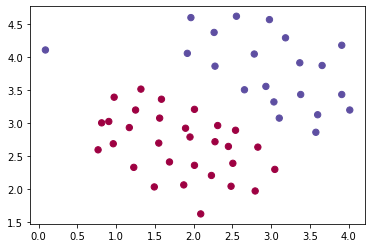

In [42]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
%matplotlib inline

# load data
raw_data = loadmat('ex6data1.mat')
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']
X = np.array(data[['X1', 'X2']])
y = np.array(data['y'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)


## Implementation
Notice that there is one outlier positive example that sits apart from the others. The classes are still linearly separable but it's a very tight fit. We're going to train a linear support vector machine to learn the class boundary. Use scikit-learn SVC to linearly classify the dataset. In svm the regularization is controled by the parameter C. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$ , where $\lambda$ is the regularization parameter that we were using previously for logistic regression. Classify the training examples with C=1 and C=100. Plot the decision boundary (or the confidence level (distance from boundary)). Explain what you observe.

### Classifier with C=1

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


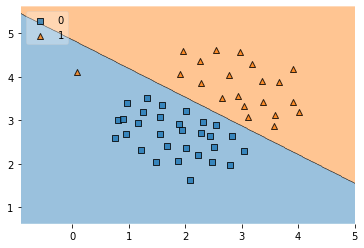

In [43]:
from sklearn import svm 
from mlxtend.plotting import plot_decision_regions
#TODO: use SVC to linearly classify
#use kernel='linear', and C=[1,100] in call to SVC
svclassifier_1 = svm.SVC(kernel='linear', C=1)
svclassifier_1.fit(X, y)
plot_decision_regions(X, y, clf=svclassifier_1, legend=2)
plt.show()

## Classifier with C=100

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


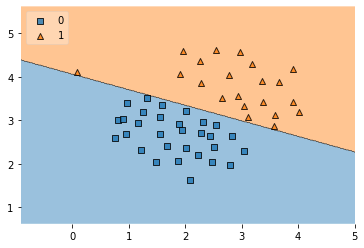

In [44]:
from sklearn import svm 
from mlxtend.plotting import plot_decision_regions
#TODO: use SVC to linearly classify
#use kernel='linear', and C=[1,100] in call to SVC
svclassifier_2 = svm.SVC(kernel='linear', C=100)
svclassifier_2.fit(X, y)
plot_decision_regions(X, y, clf=svclassifier_2, legend=2)
plt.show()

## Visualization
plot support vectors

### Visualization of Classifier with C=1

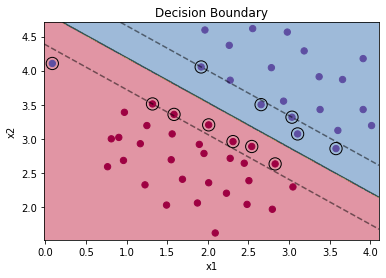

In [45]:
# Some helper functions

# Set min and max values and give it some padding
x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
h = 0.01

# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
d = np.c_[xx.ravel(), yy.ravel()]
    
# Predict the function value for the whole grid
Z = svclassifier_1.predict(d)
Z = Z.reshape(xx.shape)
    
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=.5)
    
# plot the postive and negative planes
G = svclassifier_1.decision_function(d)
G = G.reshape(xx.shape)
plt.contour(xx, yy, G, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
# plot support vectors
# TODO: plot the support vectors using "support_vectors_" attribute of SVC
sv_1 = svclassifier_1.support_vectors_
plt.scatter(sv_1[:, 0], sv_1[:, 1], s=150, linewidth=1, facecolors='none', edgecolors='k')

plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
            
plt.title('Decision Boundary')
plt.show()

### Visualization of Classifier with C=100

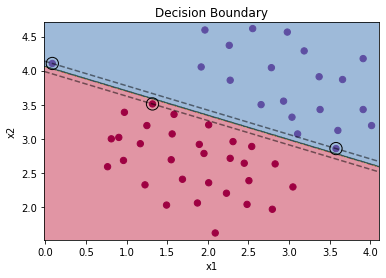

In [46]:
# Some helper functions

# Set min and max values and give it some padding
x_min, x_max = X[:,0].min() - .1, X[:,0].max() + .1
y_min, y_max = X[:,1].min() - .1, X[:,1].max() + .1
h = 0.01

# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
d = np.c_[xx.ravel(), yy.ravel()]
    
# Predict the function value for the whole grid
Z = svclassifier_2.predict(d)
Z = Z.reshape(xx.shape)
    
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=.5)
    
# plot the postive and negative planes
G = svclassifier_2.decision_function(d)
G = G.reshape(xx.shape)
plt.contour(xx, yy, G, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
# plot support vectors
# TODO: plot the support vectors using "support_vectors_" attribute of SVC
sv_2 = svclassifier_2.support_vectors_
plt.scatter(sv_2[:, 0], sv_2[:, 1], s=150, linewidth=1, facecolors='none', edgecolors='k')
        
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
            
plt.title('Decision Boundary')
plt.show()

## Answer the following Questions
    1 What effect has the parameter C on the decision boundary?
    2 What are support vectors, why do support vectors change by changing C?
    3 Use the decision_function of SVC to find the margin of the farthest positive and farthest negative data point from the decision boundary
    

## Question 1

**What effect has the parameter C on the decision boundary?**

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.

## Question 2

**What are support vectors, why do support vectors change by changing C?**

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane.

C is the penalty on the slack variables, which measure the degree to which the margin constraints are violated. A training pattern violates the margin constraint if the kernel expansion (i.e. the output of the SVM) has a value between -1 and +1, and all patterns violating this constraint will be support vectors. If you increase C, a greater penalty is put on violation of the constraint, the solution will change to reduce the size of the violations (and hence the number of violations) so the margin is made narrower, and less patterns will fall inside it, so there are fewer support vectors.

## Question 3

**Use the decision_function of SVC to find the margin of the farthest positive and farthest negative data point from the decision boundary**

### Classifier with C=1

In [47]:
print("Margin of the farthest positive data point from the decision boundary:")
print(max(svclassifier_1.decision_function(X)))

print("\nMargin of the farthest negative data point from the decision boundary:")
print(min(svclassifier_1.decision_function(X)))

Margin of the farthest positive data point from the decision boundary:
4.066743402552932

Margin of the farthest negative data point from the decision boundary:
-3.9543323500126597


### Classifier with C=100

In [48]:
print("Margin of the farthest positive data point from the decision boundary:")
print(max(svclassifier_2.decision_function(X)))

print("\nMargin of the farthest negative data point from the decision boundary:")
print(min(svclassifier_2.decision_function(X)))

Margin of the farthest positive data point from the decision boundary:
20.56616442786153

Margin of the farthest negative data point from the decision boundary:
-22.166626354992253
